In [1]:
import earthshine as etools 

import matplotlib.pylab as plt
import numpy as np
import scipy.integrate as integrate

################################################################################

# This will reload modules that have been edited
%load_ext autoreload
%autoreload 2


Text(0, 0.5, 'Flux')

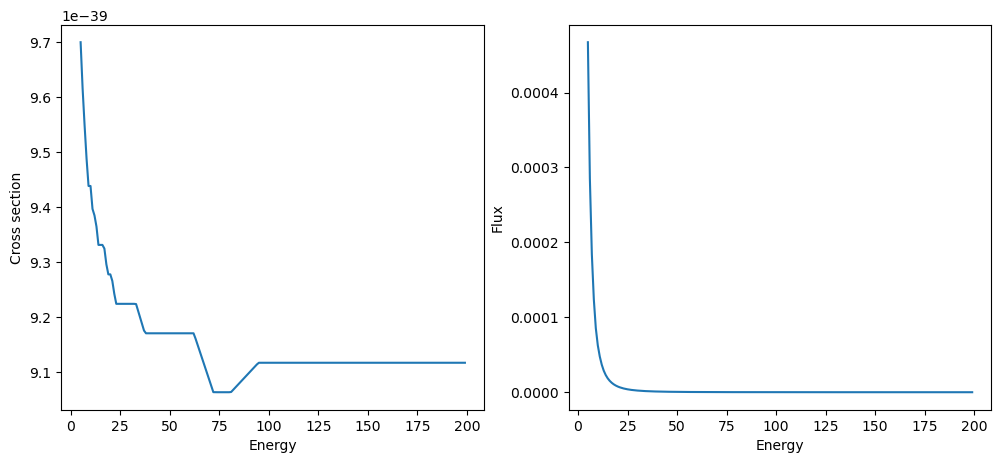

In [2]:
elo = 5
ehi = 200

e_step_size = 1
energy = np.arange(elo,ehi,e_step_size)

density = 1.6e30 # Number of nucleons per m3?
#density_m3 = density_kg * ( 6e26) # Number of nucleons per kg

length = 1 # length of "target" in meters?

CMS_length = 21 # meters
CMS_width = 15 # meters
area_of_CMS = CMS_length*CMS_width 

area_of_CMS /= 2 
# This is just because the cross section "looks" different from
# different angles, so this is just a guesstimate. 


################################################################################
y_xsec_new,a,b = etools.neutrino_cross_section(energy)
y_flux_new,a,b = etools.neutrino_flux(energy)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(energy,y_xsec_new)
plt.xlabel('Energy')
plt.ylabel('Cross section')

plt.subplot(1,2,2)
plt.plot(energy,y_flux_new)
plt.xlabel('Energy')
plt.ylabel('Flux')


distance: 1   Omega: 5.175219367117182     A_hemi: 6.283185307179586
distance: 2   Omega: 4.194749251417067     A_hemi: 25.132741228718345
distance: 3   Omega: 3.397235290137258     A_hemi: 56.548667764616276
distance: 4   Omega: 2.7734900612774727     A_hemi: 100.53096491487338
distance: 5   Omega: 2.2899105289788637     A_hemi: 157.07963267948966
distance: 6   Omega: 1.912737409205061     A_hemi: 226.1946710584651
distance: 7   Omega: 1.6151843893622317     A_hemi: 307.8760800517997
distance: 8   Omega: 1.3774988489631943     A_hemi: 402.1238596594935
distance: 9   Omega: 1.185360278357279     A_hemi: 508.93800988154646
distance: 10   Omega: 1.0283373764541555     A_hemi: 628.3185307179587
distance: 11   Omega: 0.8987368418183194     A_hemi: 760.26542216873
distance: 12   Omega: 0.7908032767021207     A_hemi: 904.7786842338604
distance: 13   Omega: 0.7001713547964491     A_hemi: 1061.85831691335
distance: 14   Omega: 0.6234882615376672     A_hemi: 1231.5043202071988
distance: 15   Om

distance: 115   Omega: 0.011853647183453902     A_hemi: 83095.12568745002
distance: 116   Omega: 0.011651087365387731     A_hemi: 84546.54149340851
distance: 117   Omega: 0.011453668015101134     A_hemi: 86010.52366998135
distance: 118   Omega: 0.011261216907975847     A_hemi: 87487.07221716856
distance: 119   Omega: 0.011073568961865185     A_hemi: 88976.18713497013
distance: 120   Omega: 0.010890565885065064     A_hemi: 90477.86842338604
distance: 121   Omega: 0.010712055844334009     A_hemi: 91992.11608241632
distance: 122   Omega: 0.010537893151669616     A_hemi: 93518.93011206096
distance: 123   Omega: 0.010367937968641626     A_hemi: 95058.31051231996
distance: 124   Omega: 0.010202056027167408     A_hemi: 96610.25728319332
distance: 125   Omega: 0.010040118365694429     A_hemi: 98174.77042468103
distance: 126   Omega: 0.009882001079826987     A_hemi: 99751.84993678311
distance: 127   Omega: 0.009727585086501594     A_hemi: 101341.49581949954
distance: 128   Omega: 0.009576755900

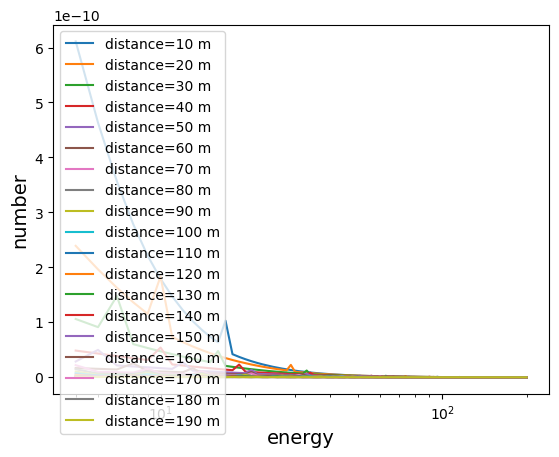

In [3]:
#print(density, length)
#print()
#print(y_xsec_new)
#print()
#print(y_flux_new)

# Let's do the calculations for many chunks of rock
N_at_CMS = np.zeros(len(energy))

# These will be at different distances from CMS

plt.figure()
for distance in range(1,200,1):

    # Calculate the number of neutrinos coming out for 1 m^2 of rock of length=length
    # per steradian, at some given energy
    N = density*length*y_flux_new*y_xsec_new

    # What is the solid angle at this distance?
    Omega = etools.solid_angle(CMS_length, CMS_width/2, distance)
    N *= Omega

    # How "many" of these 1m^2 chunks are there at distance=distance
    # *below* CMS (hemisphere)
    hemisphere_area = 2*np.pi*(distance**2) # in m^2
    N *= hemisphere_area

    print(f"distance: {distance}   Omega: {Omega}     A_hemi: {hemisphere_area}")

    # Attenuation -- energy loss!
    N_at_CMS_from_this_distance = np.zeros(len(energy))
    for i,e in enumerate(energy):
        #ke_final= etools.energy_loss_per_distance_traveled(e*1e9, distance, step_size=.1)
        ke_final = etools.final_energy_after_distance_traveled(e*1e9, distance, step_size=.1)

        ke_final /= 1e9
        idx, central = etools.find_the_number(ke_final, energy)
        #print(e, ke_final, idx, central)
        if idx is not None:
          # N is the number coming out of the 1m^2 rock at distance=distance
          # N_at_CMS is the number of muons measured at CMS as different energies
          N_at_CMS_from_this_distance[idx] += N[i]
        #else:
          #print(e, ke_final, idx, central)

    #print(N_at_CMS_from_this_distance)
    N_at_CMS += N_at_CMS_from_this_distance
    
    if distance%10==0:
        plt.plot(energy,N_at_CMS_from_this_distance,label=f'distance={distance} m')
plt.xscale('log')
plt.xlabel("energy",fontsize=14)
plt.ylabel("number",fontsize=14)
#plt.title("energy vs number at CMS (per second)")
#plt.savefig("energy_vs_number_per_second")
##plt.yscale('log')
plt.legend()






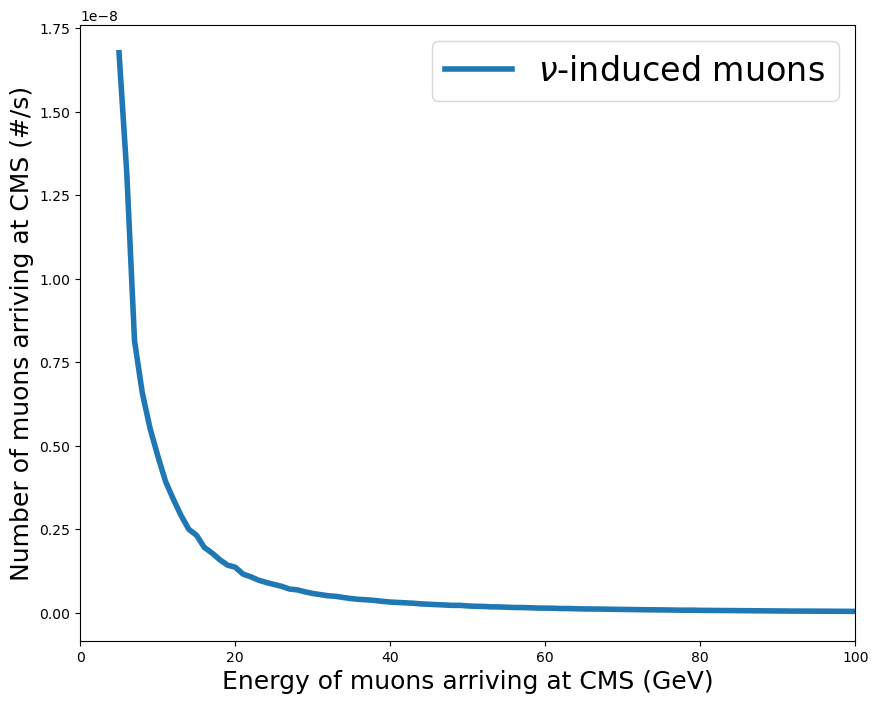

In [4]:
# Now do for CMS 
# For grant???????????????????????????????????????????????????
#N_CMS = N*area_of_CMS
#plt.figure()
plt.figure(figsize=(10,8))
#plt.plot(energy, N)
plt.plot(energy, N_at_CMS,linewidth=4,label=r'$\nu$-induced muons')
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(0,100)
plt.xlabel('Energy of muons arriving at CMS (GeV)',fontsize=18)
plt.ylabel('Number of muons arriving at CMS (#/s)',fontsize=18)


plt.legend(fontsize=24)
plt.savefig("background_earthshine.png")

The integrated number is 0.22665039737159998 per month for an energy range between 5 and 200 GeV
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199]


Text(0, 0.5, 'flux*cross section')

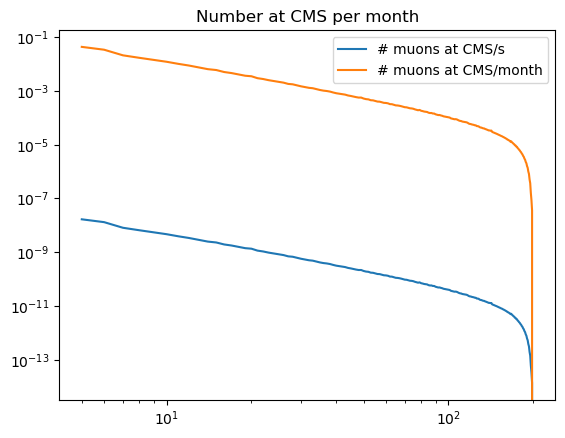

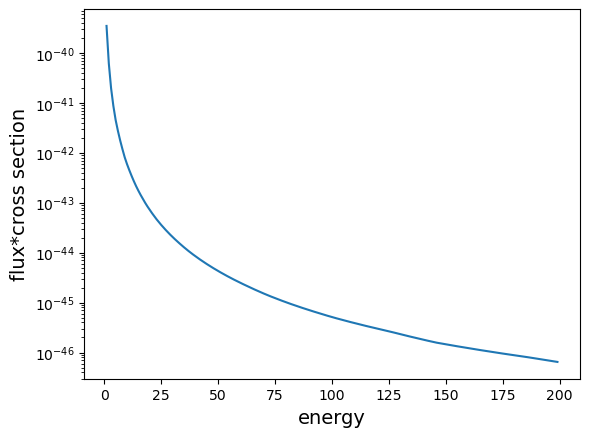

In [5]:
# Now do for CMS 
#N_CMS = N*area_of_CMS
N_CMS_month = N_at_CMS * 3e7 /  12
plt.figure()
#plt.plot(energy, N)
plt.plot(energy, N_at_CMS,label='# muons at CMS/s')
plt.plot(energy, N_CMS_month,label='# muons at CMS/month')
plt.xscale('log')
plt.yscale('log')

plt.legend()
integrated = integrate.trapz(N_CMS_month, energy)
print(f"The integrated number is {integrated} per month for an energy range between {elo} and {ehi} GeV")
plt.title("Number at CMS per month")
plt.savefig("integrated_number per month.png")

################################################################################


#ASK BELLIS!! I THINK I DID SOMETHING WRONG HERE 
#Putting in vals for en restricts the energy range, not the radius, and we want to restrict the radius. So how do I fix that? 

#plt.show()
en=np.arange(1,200)
print(en)
enlist=en.tolist()
'''
#print(enlist)
xsec_for_mult_plot=yfunction_xsec[enlist]
flux_for_mult_plot=yfunction_flux[enlist]
mult_plot= xsec_for_mult_plot*flux_for_mult_plot
plt.plot(mult_plot,enlist)
plt.show()
'''

flux_new=etools.neutrino_flux(enlist)
#fluxy=ypts not needed right now
xsec_new=etools.neutrino_cross_section(enlist)
plt.figure()
#print(ypts)
#print(flux_new[0])
tot= flux_new[0]*xsec_new[0]#*density*en[-1]
#print(tot)
plt.plot(en, tot)
#plt.xscale("log")
plt.yscale("log")
plt.xlabel("energy",fontsize=14)
plt.ylabel("flux*cross section",fontsize=14)
#plt.show()

#print(en[-1])




distance: 0   Omega: 0.0039709432265727035.   A_hemi: 248820.4213496188


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


distance: 0   Omega: 0.0039709432265727035.   A_hemi: 248820.4213496188


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


distance: 100   Omega: 0.0039709432265727035.   A_hemi: 248820.4213496188
distance: 100   Omega: 0.0039709432265727035.   A_hemi: 248820.4213496188


AttributeError: module 'earthshine' has no attribute 'energy_loss_per_distance_traveled'

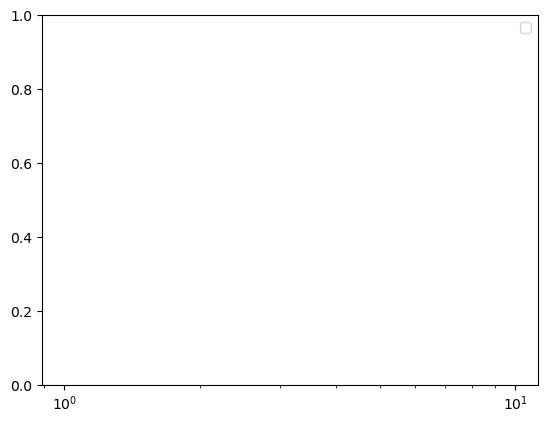

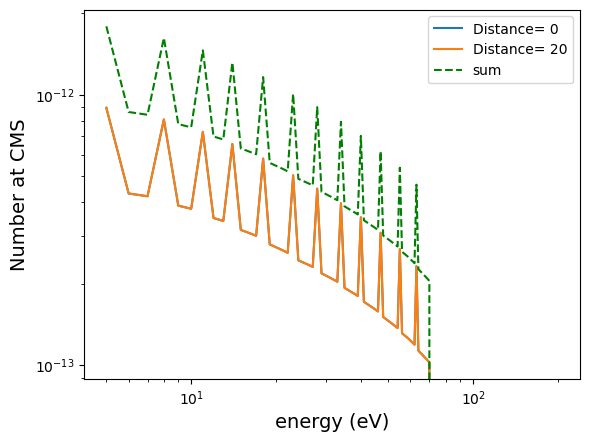

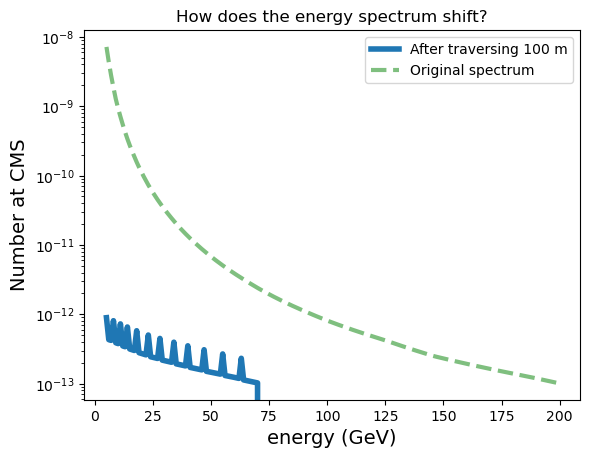

In [6]:
################################################################################

distance1= 0 

N= density*length*y_flux_new*y_xsec_new
Omega=etools.solid_angle(CMS_length, CMS_width/2, distance)
N*=Omega
hemisphere_area=2*np.pi*(distance**2)
N*=hemisphere_area
print(f"distance: {distance1}   Omega: {Omega}.   A_hemi: {hemisphere_area}")
N_at_CMS_from_this_distance1=np.zeros(len(energy))
for i,e in enumerate(energy):
  #ke_final=etools.energy_loss_per_distance_traveled(e*1e9, distance1, step_size=.1)
  ke_final = etools.final_energy_after_distance_traveled(e*1e9, distance, step_size=.1)
  ke_final/=1e9
  idx, central= etools.find_the_number(ke_final, energy)
  if idx is not None:
    N_at_CMS_from_this_distance1[idx]+= N[i]
    #x1.append(N_at_CMS_from_this_distance1[idx])
N_at_CMS+= N_at_CMS_from_this_distance1
#plt.plot(energy, N_at_CMS_from_this_distance1, label=f"distance={distance1}")
plt.xscale("log")
plt.legend()
N_CMS_month= N_at_CMS*3e7/12

distance2= 20
N= density*length*y_flux_new*y_xsec_new
Omega=etools.solid_angle(CMS_length, CMS_width/2, distance)
N*=Omega
hemisphere_area=2*np.pi*(distance**2)
N*=hemisphere_area
print(f"distance: {distance1}   Omega: {Omega}.   A_hemi: {hemisphere_area}")
N_at_CMS_from_this_distance2=np.zeros(len(energy))
for i,e in enumerate(energy): 
  #ke_final=etools.energy_loss_per_distance_traveled(e*1e9, distance2, step_size=.1)
  ke_final = etools.final_energy_after_distance_traveled(e*1e9, distance, step_size=.1)

  ke_final/=1e9
  idx, central= etools.find_the_number(ke_final, energy)
  if idx is not None:
    N_at_CMS_from_this_distance2[idx]+= N[i]
    #x1.append(N_at_CMS_from_this_distance1[idx])
N_at_CMS+= N_at_CMS_from_this_distance1
#plt.plot(energy, N_at_CMS_from_this_distance1, label=f"distance={distance1}")
plt.xscale("log")
plt.legend()
N_CMS_month= N_at_CMS*3e7/12


N_at_CMS_from_this_distance_tot= N_at_CMS_from_this_distance1+N_at_CMS_from_this_distance2

plt.figure()
plt.plot(energy, N_at_CMS_from_this_distance1, label=f"Distance= {distance1}")

plt.plot(energy, N_at_CMS_from_this_distance2, label=f"Distance= {distance2}")
plt.plot(energy, N_at_CMS_from_this_distance_tot,"g--", label="sum") 
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.yscale("log")
plt.xlabel("energy (eV)",fontsize=14)
plt.ylabel("Number at CMS", fontsize=14)
#plt.show()

##########################################################################################



################################################################################
# Plot how the energy spectrum shifts
################################################################################

distance1= 100 

N= density*length*y_flux_new*y_xsec_new
Omega=etools.solid_angle(CMS_length, CMS_width/2, distance)
N*=Omega
hemisphere_area=2*np.pi*(distance**2)
N*=hemisphere_area
print(f"distance: {distance1}   Omega: {Omega}.   A_hemi: {hemisphere_area}")

N_at_CMS_from_this_distance1=np.zeros(len(energy))

for i,e in enumerate(energy):
  #ke_final=etools.energy_loss_per_distance_traveled(e*1e9, distance1, step_size=.1)
  ke_final = etools.final_energy_after_distance_traveled(e*1e9, distance, step_size=.1)

  ke_final/=1e9
  idx, central= etools.find_the_number(ke_final, energy)
  if idx is not None:
    N_at_CMS_from_this_distance1[idx]+= N[i]
    #x1.append(N_at_CMS_from_this_distance1[idx])
N_at_CMS+= N_at_CMS_from_this_distance1
#plt.plot(energy, N_at_CMS_from_this_distance1, label=f"distance={distance1}")
plt.xscale("log")
plt.legend()
N_CMS_month= N_at_CMS*3e7/12


plt.figure()
plt.plot(energy, N_at_CMS_from_this_distance1, linewidth=4, label=f"After traversing {distance1} m")
plt.plot(energy, N,"g--", linewidth=3, alpha=0.5, label="Original spectrum") 
plt.title("How does the energy spectrum shift?")
#plt.xscale("log")
plt.legend()
#plt.ylim(2e-15, 1e-9)
#plt.ylim(2e-13, 1e-9)
#plt.xlim(0,100)
plt.yscale("log")
plt.xlabel("energy (GeV)",fontsize=14)
plt.ylabel("Number at CMS",fontsize=14)
#plt.show()

##########################################################################################

distance1= 100 
distance2=50
distance3=10
N= density*length*y_flux_new*y_xsec_new
Omega=etools.solid_angle(CMS_length, CMS_width/2, distance)
N*=Omega
hemisphere_area=2*np.pi*(distance**2)
N*=hemisphere_area
print(f"distance: {distance1}   Omega: {Omega}.   A_hemi: {hemisphere_area}")

N_at_CMS_from_this_distance1=np.zeros(len(energy))

N_at_CMS_from_this_distance3=np.zeros(len(energy))
N_at_CMS_from_this_distance2=np.zeros(len(energy))
for i,e in enumerate(energy):
  ke_final=etools.energy_loss_per_distance_traveled(e*1e9, distance1, step_size=.1)
  ke_final/=1e9
  idx, central= etools.find_the_number(ke_final, energy)
  if idx is not None:
    N_at_CMS_from_this_distance1[idx]+= N[i]
    #x1.append(N_at_CMS_from_this_distance1[idx])
N_at_CMS+= N_at_CMS_from_this_distance1
#plt.plot(energy, N_at_CMS_from_this_distance1, label=f"distance={distance1} m")
plt.xscale("log")
plt.legend()
N_CMS_month= N_at_CMS*3e7/12


for i,e in enumerate(energy):
  #ke_final=etools.energy_loss_per_distance_traveled(e*1e9, distance2, step_size=.1)
  ke_final = etools.final_energy_after_distance_traveled(e*1e9, distance, step_size=.1)

  ke_final/=1e9
  idx, central= etools.find_the_number(ke_final, energy)
  if idx is not None:
    N_at_CMS_from_this_distance1[idx]+= N[i]
    #x1.append(N_at_CMS_from_this_distance1[idx])
N_at_CMS+= N_at_CMS_from_this_distance2
#plt.plot(energy, N_at_CMS_from_this_distance1, label=f"distance={distance1} m")
plt.xscale("log")
plt.legend()
N_CMS_month= N_at_CMS*3e7/12


for i,e in enumerate(energy):
  #ke_final=etools.energy_loss_per_distance_traveled(e*1e9, distance3, step_size=.1)
  ke_final = etools.final_energy_after_distance_traveled(e*1e9, distance, step_size=.1)

  ke_final/=1e9
  idx, central= etools.find_the_number(ke_final, energy)
  if idx is not None:
    N_at_CMS_from_this_distance1[idx]+= N[i]
    #x1.append(N_at_CMS_from_this_distance1[idx])
N_at_CMS+= N_at_CMS_from_this_distance3
#plt.plot(energy, N_at_CMS_from_this_distance1, label=f"distance={distance1} m")
plt.xscale("log")
plt.legend()
N_CMS_month= N_at_CMS*3e7/12

#
#
#
#
#
#


plt.figure()
plt.plot(energy, N_at_CMS_from_this_distance1, linewidth=4, label=f"After traversing {distance1} m")
plt.plot(energy, N,"g--", linewidth=3, alpha=0.5, label="Original spectrum") 
plt.title("How does the energy spectrum shift?")
#plt.xscale("log")
plt.legend()
plt.ylim(2e-15, 1e-9)
#plt.ylim(8e-15, 1e-9)
plt.xlim(0,100)
plt.yscale("log")
plt.xlabel("energy (eV)", fontsize=14)
plt.ylabel("Number at CMS", fontsize=14)
plt.show()

##########################################################################################


ke=500e9
for a in range(0,800,50):
    x=etools.energy_loss_per_distance_traveled(ke,a)
    print(f"particle travels {a} meters, has {x/1e9:.2f} GeV left")
